# Multi- stock price prediction for North American stocks, user to input

## How to use the code
1) On Google Colab, Runtime --> click "Run all"

2) When prompted to input stock, insert the stock symbol (North American stock only), input four (4) stock symbols, and input "enough" and let the code continue to run

3) Evaluate visuals, mean absolute error/ mean squared error

4) Enjoy! :)

In [79]:
#!pip install prophet

In [80]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter, MaxNLocator
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error # the metrics being used
from datetime import datetime, timedelta
import seaborn as sns


In [81]:
def previous_workday(date):
    """
    Calculate the previous workday from the given date.
    Workdays are Monday to Friday.
    """
    while date.weekday() >= 5:  # If Saturday (5) or Sunday (6)
        date -= timedelta(days=1)
    return date

In [82]:
# Get today's date
today = datetime.today()


In [83]:
# Calculate yesterday's date and make sure it's a workday
yesterday = previous_workday(today - timedelta(days=1))

In [84]:
# Format yesterday's date as a string in the required format
end_date = yesterday.strftime('%Y-%m-%d')


In [85]:
# Function to forecast and plot a single stock
def forecast_stock(stock):
    # Load the data
    df = yf.download(stock, start='2010-01-01', end=end_date)

    # Prepare the expected column names
    df = df[['Close']].reset_index()
    df.columns = ['ds', 'y']
    df['ds'] = pd.to_datetime(df['ds'])

    # Fit the Prophet model
    model = Prophet()
    model.fit(df)

    # Make an out-of-sample forecast (next 365 days)
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)

    # Evaluate the forecast model
    # Remove the last 12 months from the training data
    train = df[df['ds'] < '2023-01-01']
    test = df[df['ds'] >= '2023-01-01']

    # Calculate mean absolute error and mean squared error
    y_true = test['y'].values
    y_pred = forecast['yhat'][-len(test):].values
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)

    return df, forecast, mae, mse, model

In [86]:
# Ask the user to input stock symbols
# Try HSY, KO, PEP, MDLZ
# Hershey Co = HSY
# Coca-Cola Co = KO
# PepsiCo Inc = PEP
# MONDELEZ = MDLZ

['CPB', 'KO', 'PEP', 'MDLZ', 'HSY', 'SHOP', 'EBAY', 'AMZN', 'BABA','PFE','MRNA','AAPL', 'TSLA', 'MSFT','AMD','GOOG','META', 'JPM','WMT','ELF','ULTA']


# search for stock symbol reference: https://www.dividend.com/food-and-beverage-industry-dividend-stocks-etfs-and-funds/


stock_list = []
while True:
    stock = input("Enter a stock symbol (or type 'enough' to finish): ")
    if stock.lower() == 'enough':
        break
    stock_list.append(stock.upper())

Enter a stock symbol (or type 'enough' to finish): KO
Enter a stock symbol (or type 'enough' to finish): MDLZ
Enter a stock symbol (or type 'enough' to finish): SHOP
Enter a stock symbol (or type 'enough' to finish): AAPL
Enter a stock symbol (or type 'enough' to finish): enough


In [88]:
# Function to make an Out-of-Sample Forecast (Next 365 Days)
def make_out_of_sample_forecast(model, periods=365):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

In [89]:
# Function to evaluate forecast model
def evaluate_forecast_model(model, test_data, actual):
    forecast = model.predict(test_data)
    forecast = forecast[['ds', 'yhat']]
    forecast = forecast.set_index('ds')
    forecast.index = pd.to_datetime(forecast.index)
    actual = actual.set_index('ds')
    mae = mean_absolute_error(actual['y'], forecast['yhat'])
    mse = mean_squared_error(actual['y'], forecast['yhat'])
    return mae, mse, forecast

[*********************100%%**********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyeeb23m6/1gi6_vnh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyeeb23m6/rrrcl6r4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63401', 'data', 'file=/tmp/tmpyeeb23m6/1gi6_vnh.json', 'init=/tmp/tmpyeeb23m6/rrrcl6r4.json', 'output', 'file=/tmp/tmpyeeb23m6/prophet_modelei7pu_qh/prophet_model-20240612214850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:48:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[*********************100%%**********************]  1 of 1 completed
INFO

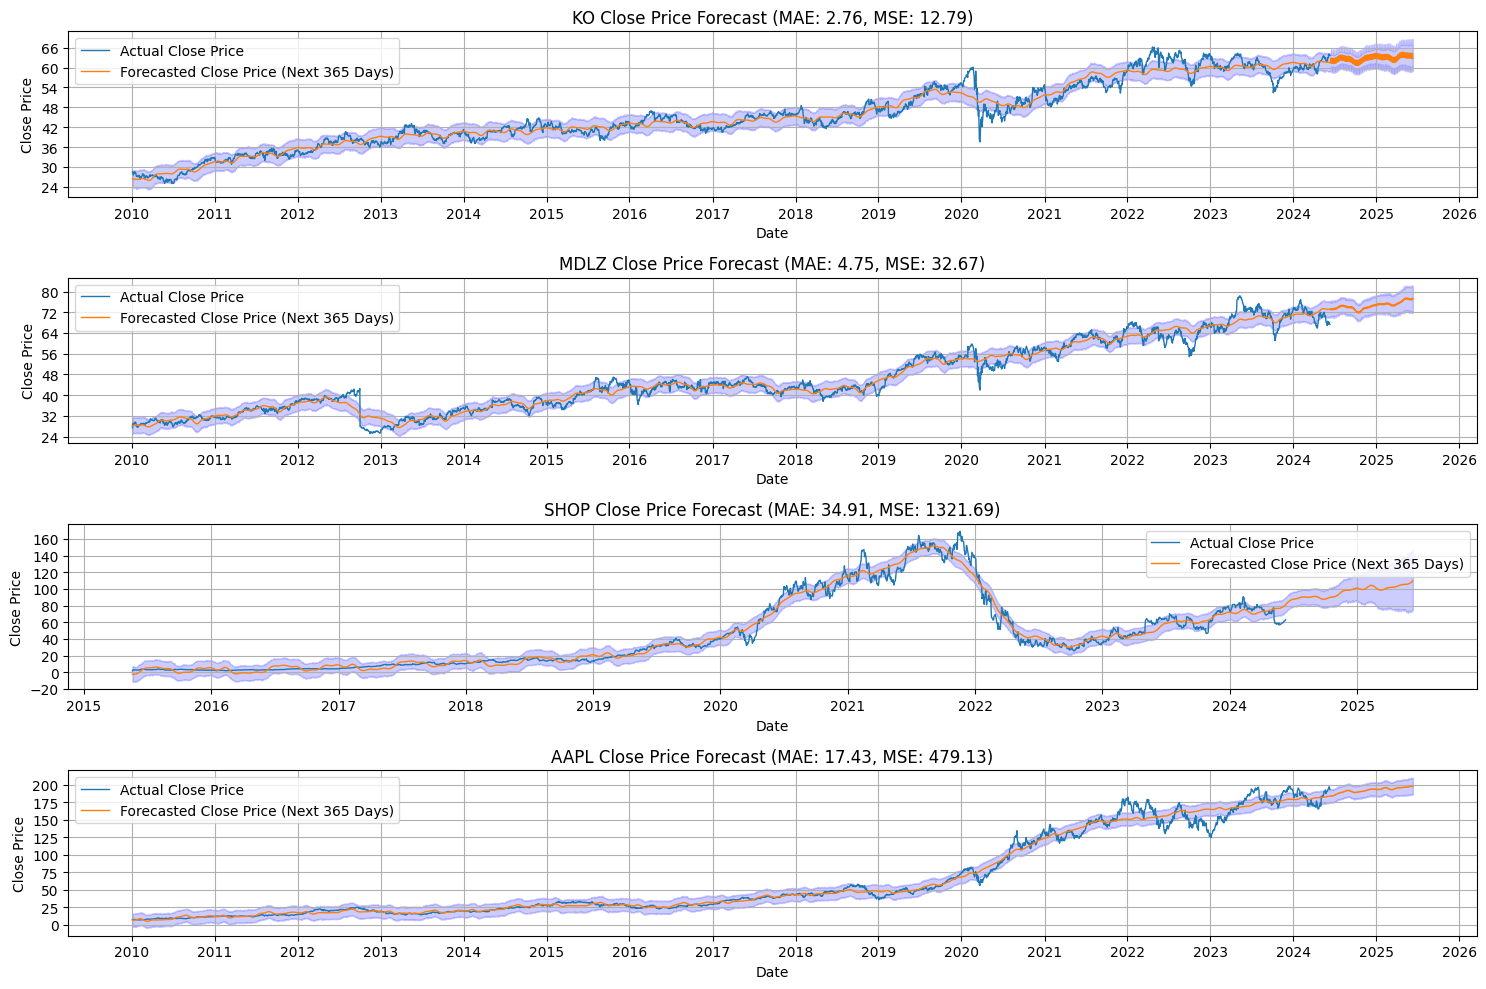

In [90]:
# Plotting the extended forecasts for all stocks (Next 365 Days)
fig, axes = plt.subplots(nrows=len(stock_list), ncols=1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i, stock in enumerate(stock_list):
    df, forecast, mae, mse, model = forecast_stock(stock)

    # Make an out-of-sample forecast for the next 365 days
    extended_forecast = make_out_of_sample_forecast(model, periods=365)

    # Plot the extended forecast
    axes[i].plot(df['ds'], df['y'], label='Actual Close Price', linewidth=1)
    axes[i].plot(extended_forecast['ds'], extended_forecast['yhat'], label='Forecasted Close Price (Next 365 Days)', linewidth=1)
    axes[i].fill_between(extended_forecast['ds'], extended_forecast['yhat_lower'], extended_forecast['yhat_upper'], color='blue', alpha=0.2)
    axes[i].set_title(f'{stock} Close Price Forecast (MAE: {mae:.2f}, MSE: {mse:.2f})')
    # axes[i].set_title(f'{stock} Close Price Extended Forecast')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Close Price')
    axes[i].legend()

    # Format the x-axis to show year-wise ticks
    axes[i].xaxis.set_major_locator(mdates.YearLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Format the y-axis to show exact numbers and set the limit from 0 to 2000
    axes[i].yaxis.set_major_formatter(ScalarFormatter())
    axes[i].ticklabel_format(useOffset=False, style='plain', axis='y')
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))

    axes[i].grid(True)

# Display the plot
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyeeb23m6/fsvupdv8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyeeb23m6/p3iz_0li.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46246', 'data', 'file=/tmp/tmpyeeb23m6/fsvupdv8.json', 'init=/tmp/tmpyeeb23m6/p3iz_0li.json', 'output', 'file=/tmp/tmpyeeb23m6/prophet_modelwxgo3v01/prophet_model-20240612214905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[*********************100%%**********************]  1 of 1 completed

KO Mean Absolute Error: 8.100284485544815
KO Mean Squared Error: 70.59867624038826



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyeeb23m6/j2wvk0a5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyeeb23m6/g2xm927x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91714', 'data', 'file=/tmp/tmpyeeb23m6/j2wvk0a5.json', 'init=/tmp/tmpyeeb23m6/g2xm927x.json', 'output', 'file=/tmp/tmpyeeb23m6/prophet_modelz1kvzmld/prophet_model-20240612214908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[*********************100%%**********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasona

MDLZ Mean Absolute Error: 2.5152273301830554
MDLZ Mean Squared Error: 10.107061498190207


DEBUG:cmdstanpy:input tempfile: /tmp/tmpyeeb23m6/l9c6qk1i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50838', 'data', 'file=/tmp/tmpyeeb23m6/rsznt9w3.json', 'init=/tmp/tmpyeeb23m6/l9c6qk1i.json', 'output', 'file=/tmp/tmpyeeb23m6/prophet_model22midh00/prophet_model-20240612214912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[*********************100%%**********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyeeb23m6/14ze_x2q.json


SHOP Mean Absolute Error: 87.08618044759172
SHOP Mean Squared Error: 8229.064176214883


DEBUG:cmdstanpy:input tempfile: /tmp/tmpyeeb23m6/9jza_lud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40969', 'data', 'file=/tmp/tmpyeeb23m6/14ze_x2q.json', 'init=/tmp/tmpyeeb23m6/9jza_lud.json', 'output', 'file=/tmp/tmpyeeb23m6/prophet_model966nyc2f/prophet_model-20240612214913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


AAPL Mean Absolute Error: 11.09129293230327
AAPL Mean Squared Error: 172.86572484746836


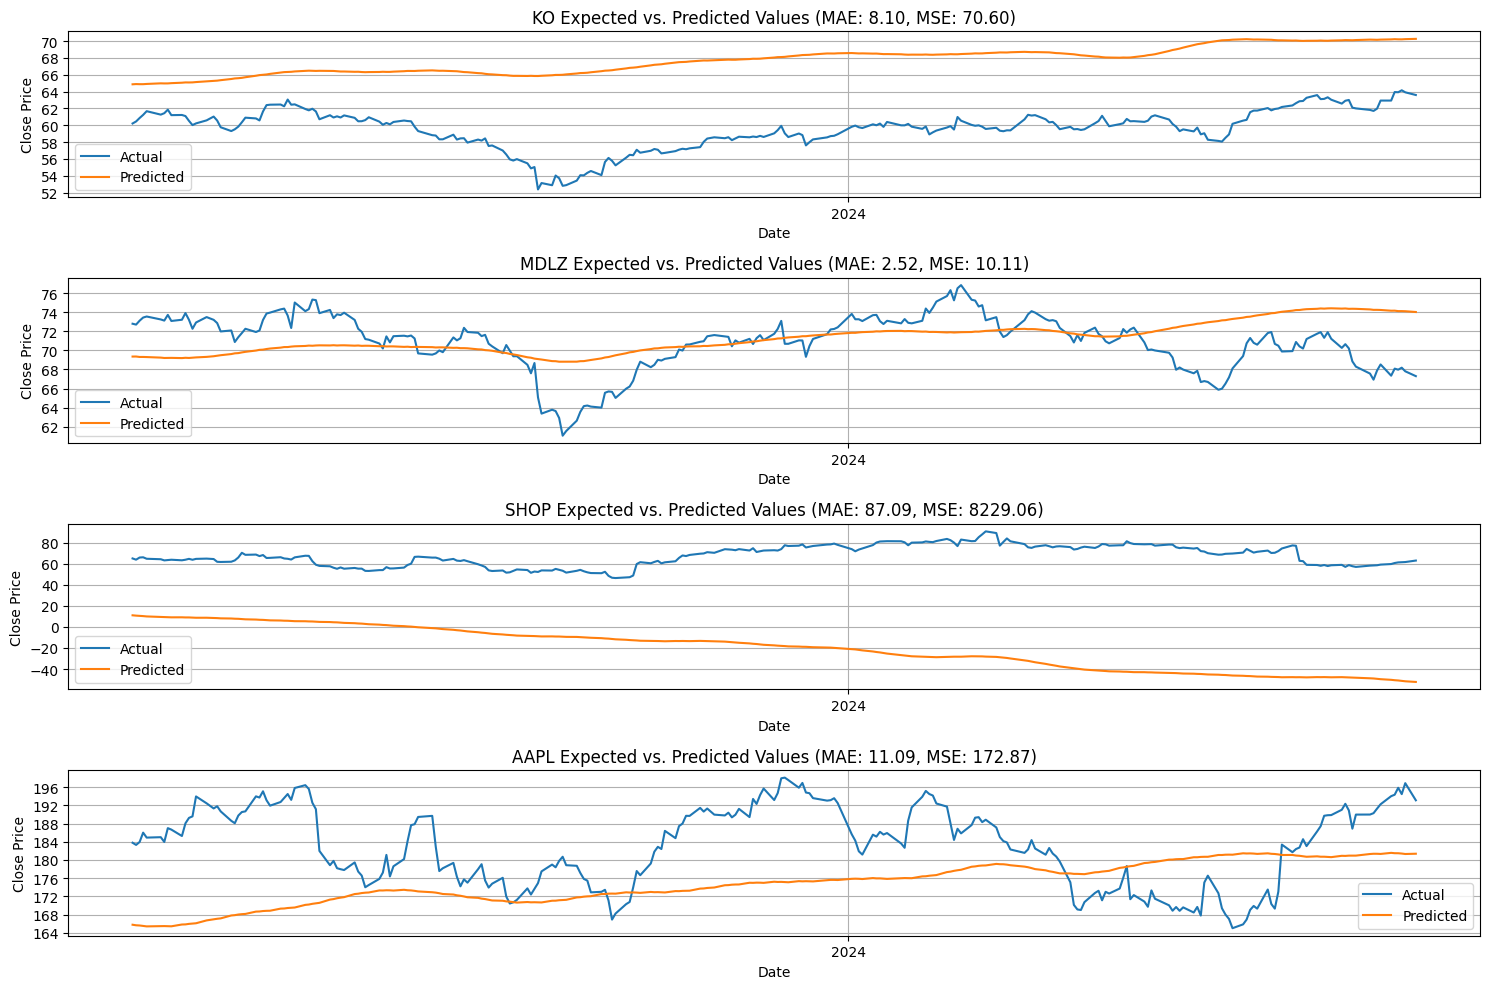

In [91]:
fig, axes = plt.subplots(nrows=len(stock_list), ncols=1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i, stock in enumerate(stock_list):
    df = yf.download(stock, start='2010-01-01', end=(datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d'))
    df = df[['Close']].reset_index()
    df.columns = ['ds', 'y']
    df['ds'] = pd.to_datetime(df['ds'])

    # Remove the last 12 months from the training data
    train_data = df[df['ds'] < df['ds'].max() - timedelta(days=365)]
    test_data = df[df['ds'] >= df['ds'].max() - timedelta(days=365)]

    # Fit the model on the training data
    model = Prophet()
    model.fit(train_data)

    # Make a forecast for the test period (Next 12 Months)
    test_period = model.make_future_dataframe(periods=len(test_data))
    forecast = model.predict(test_period)

    # Calculate mean absolute error and mean squared error
    mae, mse, forecast = evaluate_forecast_model(model, test_data[['ds']], test_data)

    print(f"{stock} Mean Absolute Error: {mae}")
    print(f"{stock} Mean Squared Error: {mse}")

    # Plot expected vs. predicted values
    axes[i].plot(test_data['ds'], test_data['y'], label='Actual')
    axes[i].plot(forecast.index, forecast['yhat'], label='Predicted')
    axes[i].set_title(f'{stock} Expected vs. Predicted Values (MAE: {mae:.2f}, MSE: {mse:.2f})')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Close Price')
    axes[i].legend()

    # Format the x-axis to show year-wise ticks
    axes[i].xaxis.set_major_locator(mdates.YearLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Format the y-axis to show exact numbers
    axes[i].yaxis.set_major_formatter(ScalarFormatter())
    axes[i].ticklabel_format(useOffset=False, style='plain', axis='y')
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))

    axes[i].grid(True)

# Display the plot
plt.tight_layout()
plt.show()